In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import time
from scipy import stats as st
import math

cm = 1/2.54  # centimeters in inches
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = 12

## Probability paradigms

### Frequentist

<IPython.core.display.Javascript object>


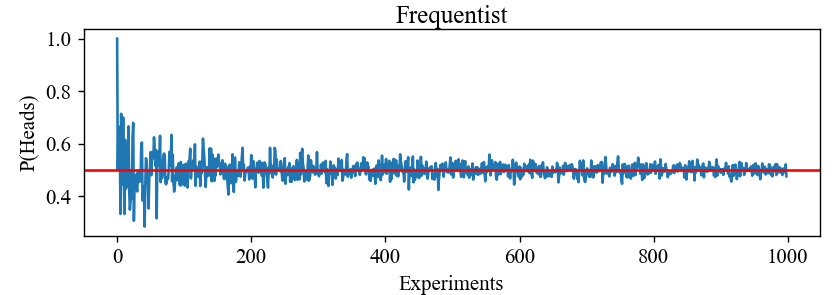

In [2]:
samples_limit = 1000
heads_prob = np.zeros(samples_limit-1)
for i in range(1,samples_limit):
    sampl = i
    coin_toss_freq = np.zeros(sampl)
    coin_toss_freq = np.random.randint(2, size=i)
    #print(coin_toss_freq)
    heads = np.sum(coin_toss_freq>0)
    heads_prob[i-1] = heads/sampl
    
fig, ax = plt.subplots(1, figsize=(17*cm, 6*cm))
ax.set_title('Frequentist', pad=1)
ax.plot(heads_prob)
ax.axhline(y = 0.5, color='r')
ax.set_xlabel('Experiments')
ax.set_ylabel('P(Heads)')
plt.subplots_adjust(left=0.10, right=.98, top=0.90, bottom=0.20, hspace = 0.65, wspace=0.15)
plt.show()

## Bayesian "probability"

## Prior model
Probability of getting heads => described by a Bernoulli distribution with parameter p_coin
p_coin => described by a Beta distribution (a=7, b=4)

0.6363636363636364 0.13886593015017698 0.2182178902359924


<IPython.core.display.Javascript object>


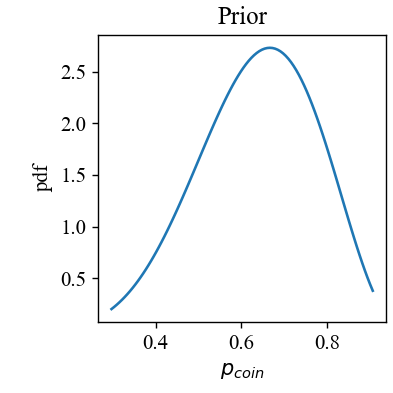

In [3]:
a_prior, b_prior = 7, 4
mean_prior, var_prior = st.beta.stats(a_prior, b_prior, moments='mv')
print(mean_prior, var_prior**0.5, var_prior**0.5/mean_prior)

x_2 = np.linspace(st.beta.ppf(0.01, a_prior, b_prior), st.beta.ppf(0.99, a_prior, b_prior), 100)
fig, ax = plt.subplots(1, figsize=(8*cm, 8*cm))
ax.plot(x_2, st.beta.pdf(x_2, a_prior, b_prior), label='beta pdf')
ax.set_title('Prior')
ax.set_xlabel('$p_{coin}$')
ax.set_ylabel('pdf')
plt.subplots_adjust(left=0.25, right=.98, top=0.91, bottom=0.18, hspace = 0.65, wspace=0.15)
plt.show()

### Fair-sided coin
Updating of hyperparameters a and b and computation of the prediction p_coin

0.4954954954954955 0.04724364180946629 0.09534625892455924


<IPython.core.display.Javascript object>


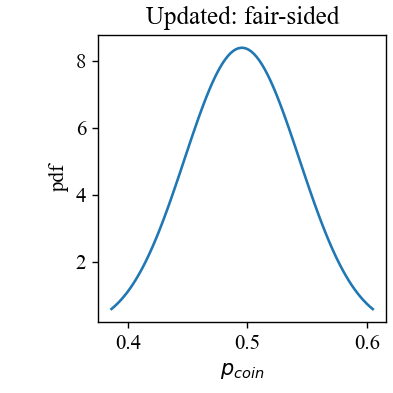

In [4]:
experim_fair = 100
outcomes_fair = np.random.randint(0,2, size=(experim_fair))
#print(outcomes_fair)

heads_fair = np.sum(outcomes_fair>0)
tails_fair = np.sum(outcomes_fair<1)

a_upd_fair, b_upd_fair = 7 + heads_fair, 4 + tails_fair
mean_fair, var_fair = st.beta.stats(a_upd_fair, b_upd_fair, moments='mv')
print(mean_fair, var_fair**0.5, var_fair**0.5/mean_fair)

x_3 = np.linspace(st.beta.ppf(0.01, a_upd_fair, b_upd_fair), st.beta.ppf(0.99, a_upd_fair, b_upd_fair), 100)
fig, ax = plt.subplots(1, figsize=(8*cm, 8*cm))
ax.plot(x_3, st.beta.pdf(x_3, a_upd_fair, b_upd_fair), label='beta pdf')
ax.set_title('Updated: fair-sided')
ax.set_xlabel('$p_{coin}$')
ax.set_ylabel('pdf')
plt.subplots_adjust(left=0.25, right=.98, top=0.91, bottom=0.18, hspace = 0.65, wspace=0.15)
plt.show()

### Biased coin
Updating of hyperparameters a and b and computation of the prediction p_coin

0.26126126126126126 0.04151202650883195 0.1588908600855292


<IPython.core.display.Javascript object>


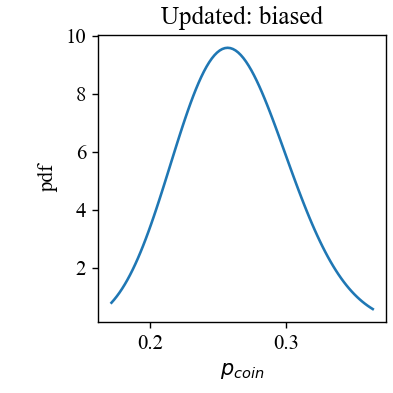

In [5]:
experim_biased = 100
outcomes_biased = np.random.binomial(1, 0.2, size=(experim_biased))
#print(outcomes_biased)

heads_biased = np.sum(outcomes_biased>0)
tails_biased = np.sum(outcomes_biased<1)

a_upd_biased, b_upd_biased = 7 + heads_biased, 4 + tails_biased
mean_biased, var_biased = st.beta.stats(a_upd_biased, b_upd_biased, moments='mv')
print(mean_biased, var_biased**0.5, var_biased**0.5/mean_biased)

x_4 = np.linspace(st.beta.ppf(0.01, a_upd_biased, b_upd_biased), st.beta.ppf(0.99, a_upd_biased, b_upd_biased), 100)
fig, ax = plt.subplots(1, figsize=(8*cm, 8*cm))
ax.plot(x_4, st.beta.pdf(x_4, a_upd_biased, b_upd_biased), label='beta pdf')
ax.set_title('Updated: biased')
ax.set_xlabel('$p_{coin}$')
ax.set_ylabel('pdf')
plt.subplots_adjust(left=0.25, right=.98, top=0.91, bottom=0.18, hspace = 0.65, wspace=0.15)
plt.show()

### Plotting prior and posteriors

<IPython.core.display.Javascript object>


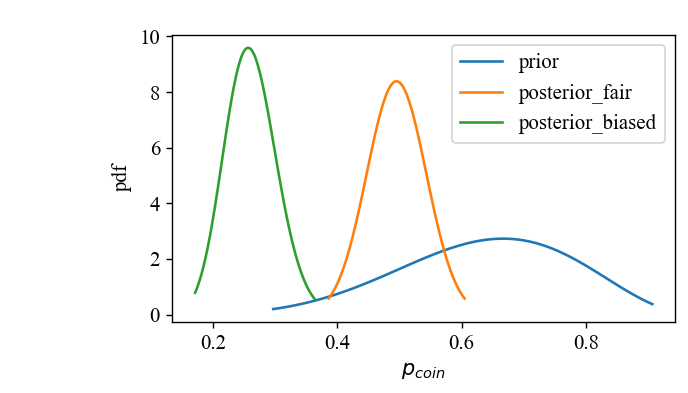

In [6]:
fig, ax = plt.subplots(1, figsize=(14*cm, 8*cm))
ax.plot(x_2, st.beta.pdf(x_2, a_prior, b_prior), label='beta pdf')
ax.plot(x_3, st.beta.pdf(x_3, a_upd_fair, b_upd_fair), label='beta pdf')
ax.plot(x_4, st.beta.pdf(x_4, a_upd_biased, b_upd_biased), label='beta pdf')
ax.set_xlabel('$p_{coin}$')
ax.set_ylabel('pdf')
ax.legend(labels=['prior', 'posterior_fair', 'posterior_biased'], loc=0)
plt.subplots_adjust(left=0.25, right=.98, top=0.91, bottom=0.18, hspace = 0.65, wspace=0.15)
plt.show()

## Uncertainty quantification

0.15865525393145707 0.02275013194817921
158.65525393145708 22.75013194817921


<IPython.core.display.Javascript object>


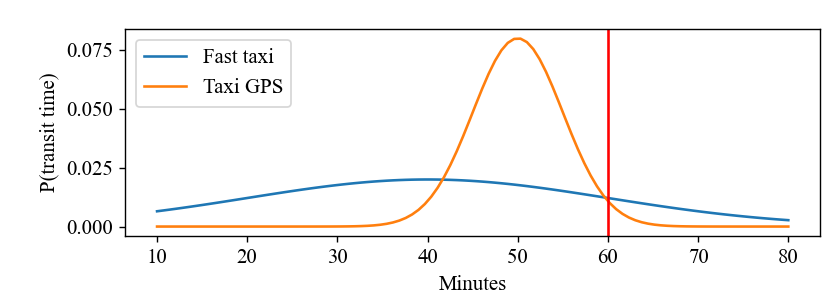

In [7]:
## Taxi driver without GPS
time_available = 60
## Taxi driver without GPS
mean_taxi = 40 
std_taxi = 20
time_taxi_p = 1-st.norm.cdf(time_available, mean_taxi, std_taxi)
risk_taxi = time_taxi_p*1000
## Taxi driver with GPS
mean_taxi_gps = 50
std_taxi_gps = 5
time_taxi_gps_p = 1-st.norm.cdf(time_available, mean_taxi_gps, std_taxi_gps)
risk_taxi_gps = time_taxi_gps_p*1000

print(time_taxi_p, time_taxi_gps_p)
print(risk_taxi, risk_taxi_gps)

x = np.linspace(10, 80, 100)
fig, ax = plt.subplots(1, figsize=(17*cm, 6*cm))
# ax.set_title('Frequentist', pad=1)
ax.plot(x, st.norm.pdf(x, mean_taxi, std_taxi))
ax.plot(x, st.norm.pdf(x, mean_taxi_gps, std_taxi_gps))
ax.axvline(x = 60, color='r')
ax.set_xlabel('Minutes')
ax.set_ylabel('P(transit time)')
ax.legend(labels=['Fast taxi', 'Taxi GPS'], loc=2)
plt.subplots_adjust(left=0.15, right=.98, top=0.90, bottom=0.20, hspace = 0.65, wspace=0.15)
plt.show()

## Model uncertainty 

P_F 0.03362


<IPython.core.display.Javascript object>


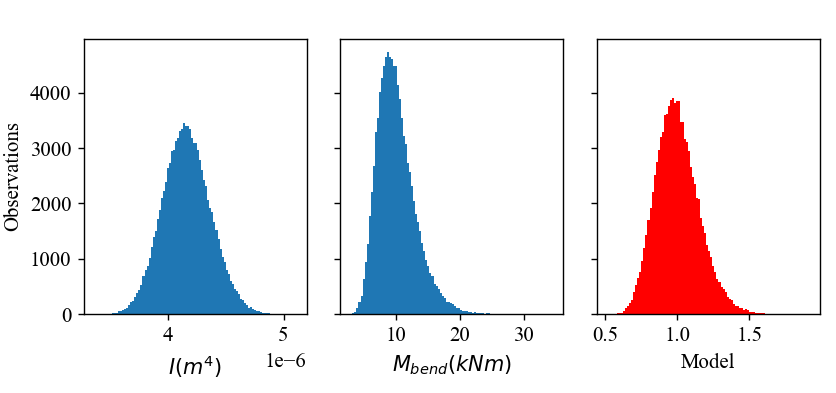

<IPython.core.display.Javascript object>


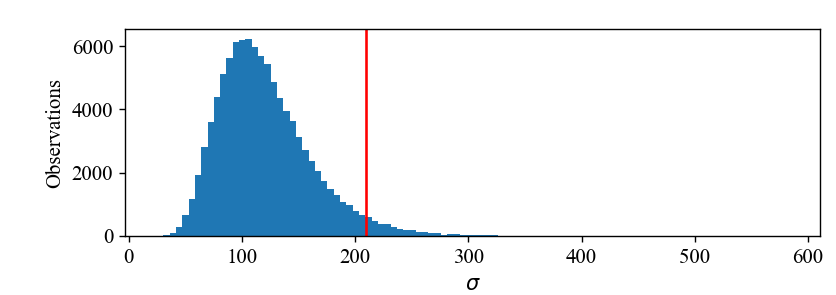

In [10]:
inertia_xx = 0.416e-5
moment_section = 4e3
y_max = 0.05
stress_comp = moment_section*y_max/inertia_xx
stress_comp/1e6

# number of samples
samples = 100000
#fixing the seed for reproducibility
np.random.seed(10)

y_max = 0.05

## Second moment of area ##
inertia_mean = 0.416e-5
inertia_cov = 0.05
inertia_std = inertia_mean*inertia_cov
mu_inertia = np.log((inertia_mean**2)/math.sqrt(inertia_std**2+inertia_mean**2))
sigma_inertia = math.sqrt(np.log(inertia_std**2/(inertia_mean**2)+1))
inertia_rn  = np.random.lognormal(mu_inertia, sigma_inertia, size=(samples))

## Moment ## 
moment_mean = 10e3
moment_cov = 0.3
moment_std = moment_mean*moment_cov
mu_moment = np.log((moment_mean**2)/math.sqrt(moment_std**2+moment_mean**2))
sigma_moment = math.sqrt(np.log(moment_std**2/(moment_mean**2)+1))
moment_rn  = np.random.lognormal(mu_moment, sigma_moment, size=(samples))

## Model uncertainty factor ##
model_mean = 1
model_cov = 0.15
# model_cov = 0.1
model_std = model_mean*model_cov
mu_model = np.log((model_mean**2)/math.sqrt(model_std**2+model_mean**2))
sigma_model = math.sqrt(np.log(model_std**2/(model_mean**2)+1))
model_rn  = np.random.lognormal(mu_model, sigma_model, size=(samples))

## Stress computation ##
stress_comp = moment_rn*y_max/inertia_rn*model_rn

p_f = np.sum(stress_comp>210e6)/samples
print('P_F', p_f)

fig, ax = plt.subplots(1, 3, figsize=(17*cm, 8*cm), sharey=True)
# ax.set_title('Frequentist', pad=1)
ax[0].hist(inertia_rn, bins=100)
ax[0].set_xlabel('$I (m^4)$')
ax[0].set_ylabel('Observations')
ax[1].hist(moment_rn/1e3, bins=100)
ax[1].set_xlabel('$M_{bend} (kNm)$')
ax[2].hist(model_rn, bins=100, color='red')
ax[2].set_xlabel('Model')
plt.subplots_adjust(left=0.10, right=.98, top=0.90, bottom=0.20, hspace = 0.65, wspace=0.15)
plt.show()

x = np.linspace(10, 80, 100)
fig, ax = plt.subplots(1, figsize=(17*cm, 6*cm))
# ax.set_title('Frequentist', pad=1)
ax.hist(stress_comp/1e6, bins=100)
ax.axvline(x = 210, color='r')
ax.set_xlabel('$\sigma$')
ax.set_ylabel('Observations')
plt.subplots_adjust(left=0.15, right=.98, top=0.90, bottom=0.20, hspace = 0.65, wspace=0.15)
plt.show()